<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_dft_scf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Density Functional (DFT-SCF)**

In [ ]:
!pip install pyscf geometric -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.0/386.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 9.8 MB/s eta 0:00:00


In [ ]:
from pyscf import gto

# Define the molecule
mol = gto.Mole()
mol.atom = '''
    N  0.0000  0.0000  0.2000
    H  0.0000  0.9433 -0.2000
    H  0.8165 -0.4717 -0.2000
    H -0.8165 -0.4717 -0.2000
'''

# Name
molecule = 'Ammonia (NH₃)'

# Set basis set
mol.basis = 'cc-pvdz' # Alternatively: sto-3g, cc-pvdz,6-31G

**DFT-SCF (Kohn-Sham)**

converged SCF energy = -56.5541464333649
converged SCF energy = -56.5541464333645


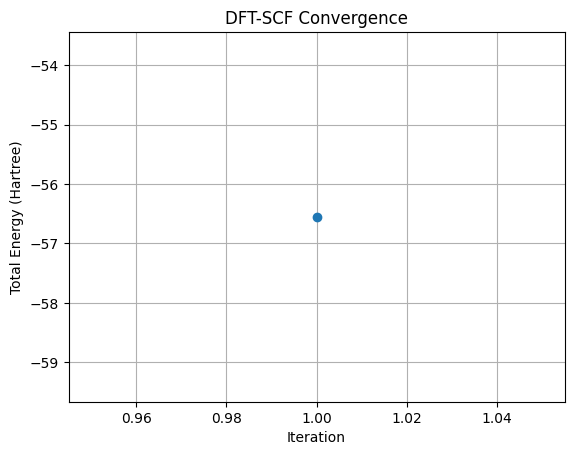

DFT energy using B3LYP: -56.554146433364544 Hartree


In [ ]:
# DFT-SCF (Kohn-Sham)

from pyscf import gto, dft
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the molecule using gto.M() function
mol.atom = mol.atom
mol.basis = mol.basis
mol.build()

# Step 2: Perform a DFT calculation using the B3LYP functional

# dft.RKS for Restricted Kohn-Sham DFT appropriate for a closed-shell system (like water)
mf = dft.RKS(mol)

# Exchange-correlation functional is set using mf.xc = 'b3lyp' (popular hybrid functional)
mf.xc = 'b3lyp'

# mf.kernel() function performs actual DFT calculation and returns energy
energy = mf.kernel()

# Store convergence data
conv_data = []

# Callback function to collect convergence information
def callback(envs):
    conv_data.append(envs['e_tot'])

# Set the callback directly on the mf object
mf.callback = callback

# Perform DFT calculation
energy = mf.kernel()

# Extract energy values and iteration numbers
energies = conv_data
iterations = range(1, len(energies) + 1)

# Plot convergence
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('DFT-SCF Convergence')
plt.grid(True)
plt.show()

print(f"DFT energy using B3LYP: {energy} Hartree")

**DFT-SCF Kohn-Sham Hamiltonian**

In [ ]:
# Kohn-Sham Hamiltonian (First Quantization) includes exchange-correlation potential, which approximates exchange and correlation effects

# Kohn-Sham formalism transforms complex many-electron problem into a simpler set of equations that describe non-interacting electrons
# but in presence of an effective potential that accounts for the effects of electron-electron interactions.

from pyscf import gto, dft

# Define the molecule using gto.M() function
mol.atom = mol.atom
mol.basis = mol.basis
mol.build()

# Perform a DFT calculation using the B3LYP functional
mf = dft.RKS(mol)
mf.xc = 'b3lyp'
mf.kernel()

# Get the Kohn-Sham Hamiltonian (core Hamiltonian + exchange-correlation potential)
ks_hamiltonian = mf.get_hcore() + mf.get_veff()

print("Kohn-Sham Hamiltonian matrix:\n", ks_hamiltonian)

converged SCF energy = -56.5541464333647
Kohn-Sham Hamiltonian matrix:
 [[-1.43009316e+01  3.06099310e+00 -2.74254818e+00 -2.42687814e-16
   4.10607287e-06  1.65203579e-02 -4.83987850e-17  1.59762120e-06
   3.51087083e-03  4.25549353e-18 -2.29899361e-06  1.30296722e-03
   3.06896977e-18 -4.18826612e-07 -7.69365324e-01 -1.14440246e+00
  -1.81495444e-17  1.40297511e+00 -5.94007938e-01 -7.70109492e-01
  -1.14471503e+00  1.21616502e+00 -7.02590061e-01 -5.94878820e-01
  -7.70109492e-01 -1.14471503e+00 -1.21616502e+00 -7.02590061e-01
  -5.94878820e-01]
 [ 3.06099310e+00 -1.13876189e+00 -1.33928746e-01 -6.95277169e-16
   6.95656094e-05  7.62625179e-02 -2.87964097e-16  5.04038849e-05
   6.31544682e-02  1.43635104e-16 -6.66630068e-05  5.78010052e-02
   5.88504939e-17  3.21274867e-06 -2.48494219e-01 -2.29584960e-01
  -1.30277733e-16 -4.39939909e-02  2.49687959e-02 -2.48551697e-01
  -2.29630394e-01 -3.83978412e-02  2.21965970e-02  2.51386125e-02
  -2.48551697e-01 -2.29630394e-01  3.83978412e-02  

In [ ]:
print("Kohn-Sham Hamiltonian Matrix Shape:", ks_hamiltonian.shape)
print("Kohn-Sham Hamiltonian Matrix Size:", ks_hamiltonian.size)
print("Kohn-Sham Hamiltonian Matrix Dimension:", ks_hamiltonian.ndim)
print("Kohn-Sham Hamiltonian Matrix Trace:", np.trace(ks_hamiltonian))
print("Kohn-Sham Hamiltonian Matrix Determinant:", np.linalg.det(ks_hamiltonian))
print("Kohn-Sham Hamiltonian Matrix Rank:", np.linalg.matrix_rank(ks_hamiltonian))

Kohn-Sham Hamiltonian Matrix Shape: (29, 29)
Kohn-Sham Hamiltonian Matrix Size: 841
Kohn-Sham Hamiltonian Matrix Dimension: 2
Kohn-Sham Hamiltonian Matrix Trace: -2.102268748165449
Kohn-Sham Hamiltonian Matrix Determinant: -6.23835098272105e-08
Kohn-Sham Hamiltonian Matrix Rank: 29
